## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
df = pd.read_csv(url)

# Check for missing values
print(df.isnull().sum())

# Handle missing values (for example, by imputing with mean)
df.fillna(df.mean(), inplace=True)

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which features are categorical and which are numerical
categorical_features = ['sex', 'cp']
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that includes preprocessing and the classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Accuracy: 0.8524590163934426


## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (212, 13)
X_test shape: (91, 13)
y_train shape: (212,)
y_test shape: (91,)


## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees and max depth of 10
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

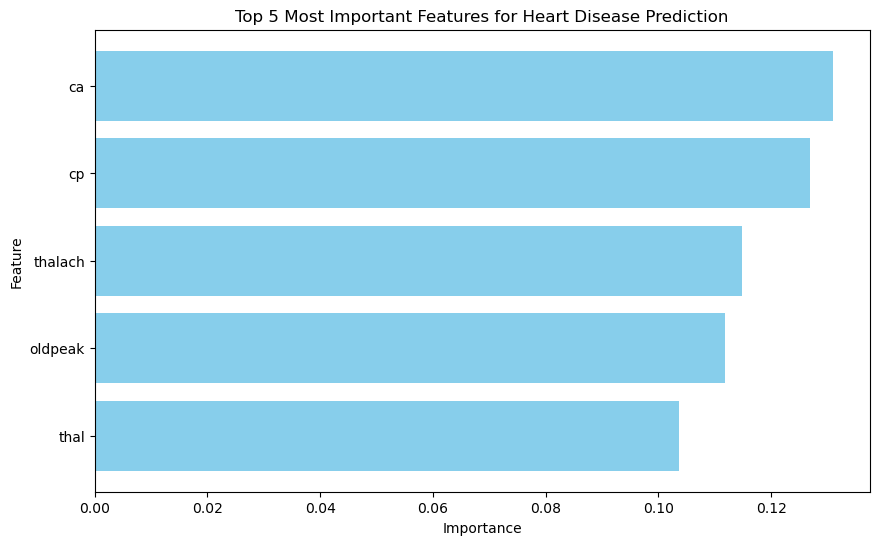

In [5]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest classifier
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = feature_importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model) with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_model_accuracy = best_model.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy with Best Hyperparameters:", best_model_accuracy)

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier with the best hyperparameters
best_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  random_state=42)

# Fit the best model to the training data
best_clf.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_best = best_clf.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Compare with the default model
default_model_accuracy = clf.score(X_test, y_test)

# Print results
print("Best Hyperparameters:", best_params)
print("Accuracy (Tuned Model):", accuracy_best)
print("Precision (Tuned Model):", precision_best)
print("Recall (Tuned Model):", recall_best)
print("F1 Score (Tuned Model):", f1_best)
print("Accuracy (Default Model):", default_model_accuracy)

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the two most important features
X_two_features = X[['age', 'thalach']]

# Fit the Random Forest classifier on these two features
clf.fit(X_two_features, y)

# Define a grid of points in the feature space
x_min, x_max = X_two_features['age'].min() - 1, X_two_features['age'].max() + 1
y_min, y_max = X_two_features['thalach'].min() - 1, X_two_features['thalach'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Use the trained classifier to make predictions on the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(X_two_features['age'], X_two_features['thalach'], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()